////////////////////////////////////////////////////////////////////////////////
**เตรียมข้อมูล**
////////////////////////////////////////////////////////////////////////////////

In [23]:
# โหลด Dataset จาก Kaggle

import kagglehub
import pandas as pd
import os

# ดาวน์โหลด
path = kagglehub.dataset_download("mczielinski/bitcoin-historical-data")
print(os.listdir(path))
file_path = os.path.join(path, "btcusd_1-min_data.csv")

# โหลดข้อมูล
df = pd.read_csv(file_path)
df.head()


Using Colab cache for faster access to the 'bitcoin-historical-data' dataset.
['btcusd_1-min_data.csv']


,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [24]:
import pandas as pd
import numpy as np

# ตั้งค่าการแสดงผล
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)


In [25]:
# เช็คขนาดข้อมูล
df.shape

(7427201, 6)

In [26]:
# ชนิดข้อมูลแต่ละคอลัมน์
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7427201 entries, 0 to 7427200
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 340.0 MB


In [27]:
# สถิติเบื้องต้น
df.describe()


,Timestamp,Open,High,Low,Close,Volume
count,7.427201e+06,7.427201e+06,7.427201e+06,7.427201e+06,7.427201e+06,7.427201e+06
mean,1.548233e+09,2.220876e+04,2.221666e+04,2.220067e+04,2.220877e+04,5.084913e+00
std,1.286503e+08,3.073273e+04,3.074107e+04,3.072430e+04,3.073274e+04,2.191613e+01
min,1.325412e+09,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,1.436820e+09,4.480000e+02,4.481400e+02,4.479800e+02,4.480000e+02,2.033054e-02
50%,1.548228e+09,7.485950e+03,7.490100e+03,7.480940e+03,7.485790e+03,4.509218e-01
75%,1.659636e+09,3.413600e+04,3.415348e+04,3.411900e+04,3.413500e+04,2.874928e+00
max,1.771114e+09,1.262020e+05,1.262720e+05,1.261580e+05,1.262020e+05,5.853852e+03


In [28]:
# แปลง Timestamp เป็น datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# เรียงข้อมูลตามเวลา
df = df.sort_values('Timestamp').reset_index(drop=True)

# ตรวจสอบอีกครั้ง
df.head()


,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


In [29]:
# ตรวจสอบค่า missing
df.isnull().sum()


,0
Timestamp,0
Open,0
High,0
Low,0
Close,0
Volume,0


////////////////////////////////////////////////////////////////////////////////
**สร้าง Target**
////////////////////////////////////////////////////////////////////////////////

In [30]:
# ==============================
# Create price_direction(Target) Variable
# ==============================

# ตรวจสอบข้อมูลเบื้องต้น
print(df.head())
print(df.tail())

# สร้างคอลัมน์ Close(t+1) โดยเลื่อน Close ขึ้นไป 1 แถว
HORIZON = 1440
df["close_next"] = df["Close"].shift(-HORIZON)

# สร้าง price_direction:
# 1 = ราคาขึ้น (Close(t+1) > Close(t))
# 0 = ราคาลงหรือเท่าเดิม
df["price_direction"] = (df["close_next"] > df["Close"]).astype(int)

# ลบแถวที่มี NaN (จะเกิดที่แถวสุดท้าย)
df = df.dropna()

# ตรวจสอบผลลัพธ์
df[["Close", "close_next", "price_direction"]].head()


            Timestamp  Open  High   Low  Close  Volume
0 2012-01-01 10:01:00  4.58  4.58  4.58   4.58     0.0
1 2012-01-01 10:02:00  4.58  4.58  4.58   4.58     0.0
2 2012-01-01 10:03:00  4.58  4.58  4.58   4.58     0.0
3 2012-01-01 10:04:00  4.58  4.58  4.58   4.58     0.0
4 2012-01-01 10:05:00  4.58  4.58  4.58   4.58     0.0
                  Timestamp     Open     High      Low    Close    Volume
7427196 2026-02-14 23:57:00  69786.0  69790.0  69767.0  69767.0  0.033120
7427197 2026-02-14 23:58:00  69768.0  69770.0  69766.0  69770.0  0.104269
7427198 2026-02-14 23:59:00  69770.0  69797.0  69746.0  69791.0  0.038832
7427199 2026-02-15 00:00:00  69791.0  69791.0  69763.0  69789.0  0.144831
7427200 2026-02-15 00:01:00  69799.0  69799.0  69744.0  69744.0  0.887415


,Close,close_next,price_direction
0,4.58,5.0,1
1,4.58,5.0,1
2,4.58,5.0,1
3,4.58,5.0,1
4,4.58,5.0,1


////////////////////////////////////////////////////////////////////////////////
**ลดขนาดข้อมูล**
////////////////////////////////////////////////////////////////////////////////

In [31]:
# =====================================
# ลดขนาดข้อมูลจาก 7,402,719 แถว(14 ปีล่าสุด) เหลือ 525_600 แถว(1 ปีล่าสุด)
# =====================================

# ตรวจสอบจำนวนแถวปัจจุบัน
print("Original shape:", df.shape)

# เลือกใช้ข้อมูล 1 ปีล่าสุด
df = df.tail(525_600)

# reset index เพื่อความเรียบร้อย
df = df.reset_index(drop=True)

# ตรวจสอบอีกครั้ง
print("New shape:", df.shape)


Original shape: (7425761, 8)
New shape: (525600, 8)


////////////////////////////////////////////////////////////////////////////////
**สร้าง Feature**
////////////////////////////////////////////////////////////////////////////////

In [32]:
# =========================================
#Feature / Target & Time-based Split
# =========================================

# 1) กำหนด Target
y = df["price_direction"]

# 2) กำหนด Feature
# ไม่ใช้ Timestamp และ Target เป็น Feature
X = df.drop(columns=["price_direction", "Timestamp"])

# ตรวจสอบ Feature ที่ใช้
print("Features used:")
print(X.columns)

# 3) Time-based split (80% train, 20% test)
split_index = int(len(df) * 0.8)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]

# 4) ตรวจสอบขนาดข้อมูล
print("\nData split summary:")
print("Train size:", X_train.shape)
print("Test size :", X_test.shape)

# 5) เช็กช่วงเวลา (ยืนยันว่าไม่ leak)
print("\nTrain time range:")
print(df.iloc[:split_index]["Timestamp"].min(), "→", df.iloc[:split_index]["Timestamp"].max())

print("\nTest time range:")
print(df.iloc[split_index:]["Timestamp"].min(), "→", df.iloc[split_index:]["Timestamp"].max())


Features used:
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'close_next'], dtype='object')

Data split summary:
Train size: (420480, 6)
Test size : (105120, 6)

Train time range:
2025-02-13 04:42:00 → 2025-12-03 00:01:00

Test time range:
2025-12-03 00:02:00 → 2026-02-14 00:01:00


////////////////////////////////////////////////////////////////////////////////
**Train Random Forest**
////////////////////////////////////////////////////////////////////////////////

In [33]:
from sklearn.ensemble import RandomForestClassifier

# สร้างโมเดล Random Forest
rf_model = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

# ฝึกโมเดลด้วยข้อมูล train (อดีต)
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")


Random Forest model trained successfully!


////////////////////////////////////////////////////////////////////////////////
**Train Gradient Boosting**
////////////////////////////////////////////////////////////////////////////////

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# สร้างโมเดล Gradient Boosting
gb_model = GradientBoostingClassifier(
    random_state=42
)

# เทรนโมเดล
gb_model.fit(X_train, y_train)

print("Gradient Boosting training finished")


Gradient Boosting training finished


////////////////////////////////////////////////////////////////////////////////
**Evaluation**
////////////////////////////////////////////////////////////////////////////////


In [35]:
# Evaluation – Random Forest
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# ทำนายผล
y_pred_rf = rf_model.predict(X_test)

# ประเมินผล
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest")
print("Accuracy:", round(acc_rf, 4))
print("F1-score:", round(f1_rf, 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest
Accuracy: 0.9036
F1-score: 0.9031
Confusion Matrix:
 [[47762  9508]
 [  624 47226]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90     57270
           1       0.83      0.99      0.90     47850

    accuracy                           0.90    105120
   macro avg       0.91      0.91      0.90    105120
weighted avg       0.92      0.90      0.90    105120



In [36]:
# Evaluation – Gradient Boosting
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# ทำนายผล
y_pred_gb = gb_model.predict(X_test)

# ประเมินผล
acc_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print("Gradient Boosting")
print("Accuracy:", round(acc_gb, 4))
print("F1-score:", round(f1_gb, 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting
Accuracy: 0.7503
F1-score: 0.6828
Confusion Matrix:
 [[50613  6657]
 [19596 28254]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79     57270
           1       0.81      0.59      0.68     47850

    accuracy                           0.75    105120
   macro avg       0.77      0.74      0.74    105120
weighted avg       0.76      0.75      0.74    105120



In [37]:
# เปรียบเทียบผลโมเดล (Accuracy + F1)
import pandas as pd

results = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting"],
    "Accuracy": [acc_rf, acc_gb],
    "F1-score": [f1_rf, f1_gb]
})

results


,Model,Accuracy,F1-score
0,Random Forest,0.903615,0.903121
1,Gradient Boosting,0.750257,0.682785


////////////////////////////////////////////////////////////////////////////////
**Feature Importance**
////////////////////////////////////////////////////////////////////////////////


In [38]:
# Feature Importance – Random Forest (Gini-based)
import pandas as pd

rf_importance = pd.Series(
    rf_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

rf_importance


,0
close_next,0.698825
Close,0.078726
High,0.075537
Low,0.072581
Open,0.065444
Volume,0.008887


In [39]:
# Feature Importance – Gradient Boosting (Gini-based)
gb_importance = pd.Series(
    gb_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

gb_importance


,0
close_next,0.498137
High,0.282763
Low,0.128724
Close,0.073482
Open,0.016894
Volume,0.000000


In [40]:
# เปรียบเทียบ Feature Importance ระหว่างโมเดล
feature_compare = pd.DataFrame({
    "Random Forest": rf_importance,
    "Gradient Boosting": gb_importance
}).fillna(0)

feature_compare


,Random Forest,Gradient Boosting
Close,0.078726,0.073482
High,0.075537,0.282763
Low,0.072581,0.128724
Open,0.065444,0.016894
Volume,0.008887,0.000000
close_next,0.698825,0.498137


In [41]:
import pandas as pd

# ดึง feature importance จาก Random Forest
importance = rf_model.feature_importances_
features = X_train.columns

fi_df = pd.DataFrame({
    "ตัวแปร": features,
    "ความสำคัญ (%)": importance * 100
}).sort_values(by="ความสำคัญ (%)", ascending=False)

fi_df


,ตัวแปร,ความสำคัญ (%)
5,close_next,69.882482
3,Close,7.872584
1,High,7.553703
2,Low,7.258111
0,Open,6.544410
4,Volume,0.888710


,Random Forest (%),Gradient Boosting (%)
close_next,69.88,49.81
Close,7.87,7.35
High,7.55,28.28
Low,7.26,12.87
Open,6.54,1.69
Volume,0.89,0.00


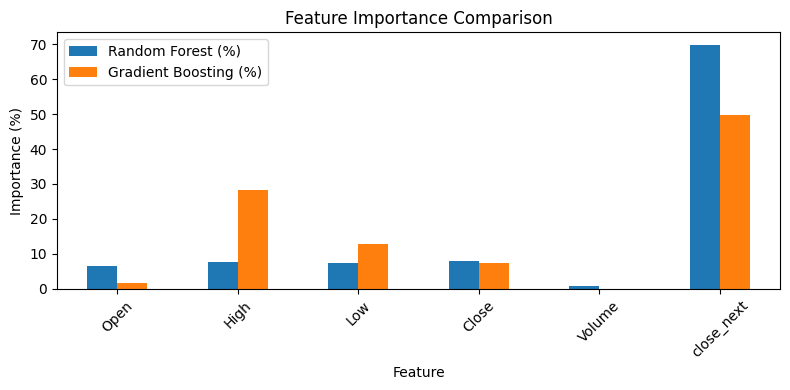

In [44]:
# รวม importance ของทั้งสองโมเดล
import matplotlib.pyplot as plt

rf_imp = pd.Series(rf_model.feature_importances_, index=X_train.columns)
gb_imp = pd.Series(gb_model.feature_importances_, index=X_train.columns)

compare_imp = pd.DataFrame({
    'Random Forest (%)': rf_imp * 100,
    'Gradient Boosting (%)': gb_imp * 100
}).round(2)

display(compare_imp.sort_values('Random Forest (%)', ascending=False))

# กราฟ
compare_imp.plot(kind='bar', figsize=(8,4))
plt.title('Feature Importance Comparison')
plt.ylabel('Importance (%)')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


////////////////////////////////////////////////////////////////////////////////
**ตาราง**
////////////////////////////////////////////////////////////////////////////////


In [45]:
print("Descriptive Statistics")
display(df.describe())


Descriptive Statistics


,Timestamp,Open,High,Low,Close,Volume,close_next,price_direction
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2025-08-15 10:26:46.662099712,99923.042049,99947.161396,99898.886499,99922.966592,1.378080,99849.653115,0.503720
min,2025-02-13 04:42:00,60172.000000,60500.000000,59930.000000,60039.000000,0.000000,60039.000000,0.000000
25%,2025-05-16 06:01:45,88357.000000,88384.000000,88333.000000,88358.000000,0.042372,88280.000000,0.000000
50%,2025-08-15 12:01:30,102430.000000,102458.000000,102400.000000,102430.000000,0.267379,102430.000000,1.000000
75%,2025-11-14 18:01:15,111127.000000,111148.250000,111104.000000,111126.000000,1.087273,111126.000000,1.000000
max,2026-02-14 00:01:00,126202.000000,126272.000000,126158.000000,126202.000000,178.354657,126202.000000,1.000000
std,NaN,13296.223168,13293.014427,13299.480259,13296.522872,3.828403,13390.087014,0.499987


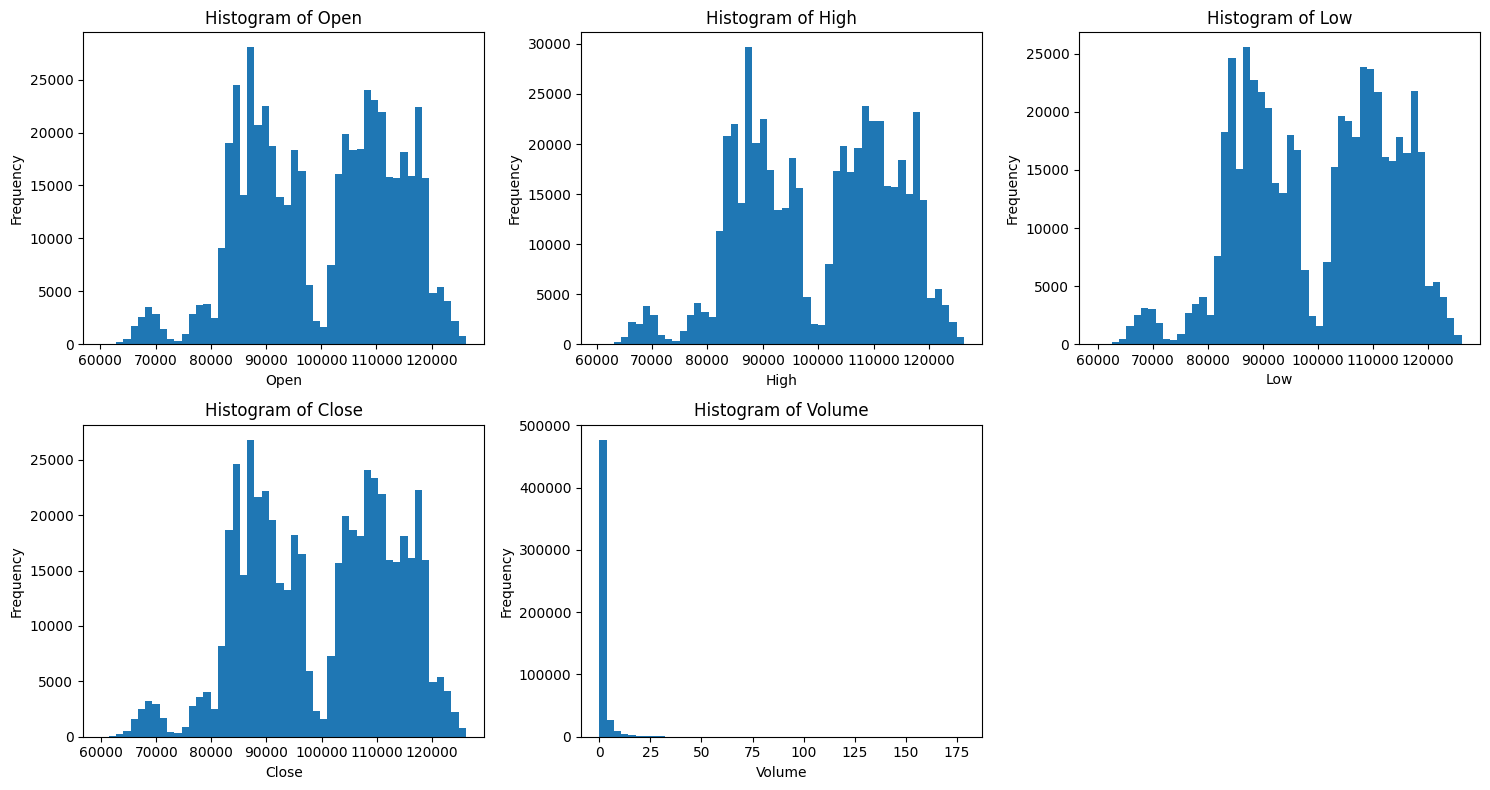

In [46]:
# ตาราง Histogram

import matplotlib.pyplot as plt

features = ["Open", "High", "Low", "Close", "Volume"]

plt.figure(figsize=(15,8))

for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col], bins=50)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


////////////////////////////////////////////////////////////////////////////
**เปรียบเทียบ Accuracy และ F1-score**
////////////////////////////////////////////////////////////////////////////


In [47]:
# เปรียบเทียบ Accuracy และ F1-score

from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# --- Predict on test set ---
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# --- Calculate metrics ---
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

acc_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

# --- Create comparison table ---
comparison_table = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting"],
    "Accuracy (Test)": [acc_rf, acc_gb],
    "F1-score (Test)": [f1_rf, f1_gb]
})

comparison_table


,Model,Accuracy (Test),F1-score (Test)
0,Random Forest,0.903615,0.903121
1,Gradient Boosting,0.750257,0.682785


In [48]:
# เปรียบเทียบ Accuracy และ F1-score เป็นเปอร์เซ็น

comparison_percent = comparison_table.copy()

comparison_percent["Accuracy (%)"] = comparison_percent["Accuracy (Test)"] * 100
comparison_percent["F1-score (%)"] = comparison_percent["F1-score (Test)"] * 100

# เลือกแสดงเฉพาะคอลัมน์เปอร์เซ็น + ปัดทศนิยม
comparison_percent_display = comparison_percent[[
    "Model", "Accuracy (%)", "F1-score (%)"
]].round(2)

comparison_percent_display


,Model,Accuracy (%),F1-score (%)
0,Random Forest,90.36,90.31
1,Gradient Boosting,75.03,68.28


/////////////////////////////////////////////////////////////////////
**กราฟทำนายเทียบค่าจริง (Actual vs Predicted)**
/////////////////////////////////////////////////////////////////////


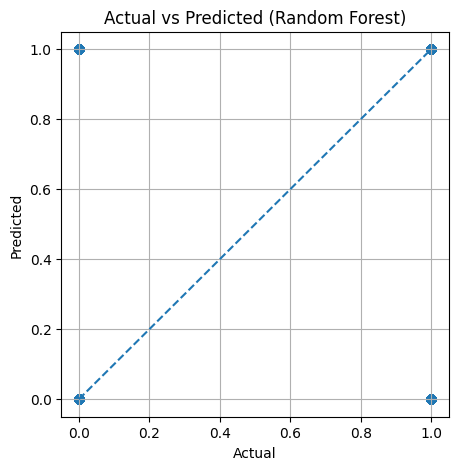

In [49]:
import matplotlib.pyplot as plt

# ทำนาย Random Forest
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([0,1], [0,1], linestyle="--")
plt.title("Actual vs Predicted (Random Forest)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()


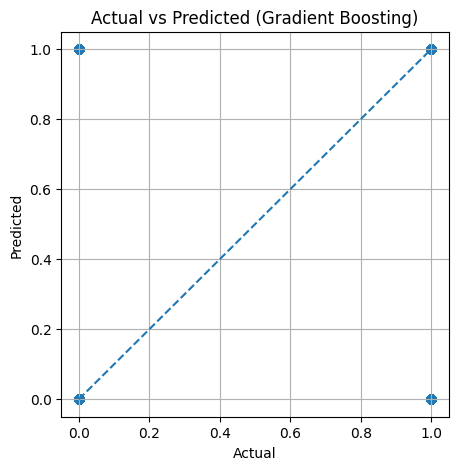

In [50]:
# ทำนาย Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_gb, alpha=0.6)
plt.plot([0,1], [0,1], linestyle="--")
plt.title("Actual vs Predicted (Gradient Boosting)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()


/////////////////////////////////////////////////////////////////////
**กรณีศึกษาตัวอย่างที่ทํานายผิด + วิเคราะห์สาเหตุ**
/////////////////////////////////////////////////////////////////////


In [51]:
# รวมผลทำนายกับค่าจริง
error_df = X_test.copy()
error_df["Actual"] = y_test.values
error_df["Pred_RF"] = y_pred_rf
error_df["Pred_GB"] = y_pred_gb

# กรองเฉพาะที่ Random Forest ทำนายผิด
rf_errors = error_df[error_df["Actual"] != error_df["Pred_RF"]]
gb_errors = error_df[error_df["Actual"] != error_df["Pred_GB"]]

print("จำนวนที่ Random Forest ทำนายผิด:", len(rf_errors))
rf_errors.head()
print("จำนวนที่ Gradient Boosting ทำนายผิด:", len(gb_errors))
gb_errors.head()


จำนวนที่ Random Forest ทำนายผิด: 10132
จำนวนที่ Gradient Boosting ทำนายผิด: 26253


,Open,High,Low,Close,Volume,close_next,Actual,Pred_RF,Pred_GB
420776,93222.0,93487.0,93222.0,93436.0,23.053164,93328.0,0,0,1
420777,93419.0,93419.0,93300.0,93379.0,2.389300,93361.0,0,1,1
420780,93298.0,93376.0,93223.0,93334.0,10.930076,93302.0,0,0,1
420781,93333.0,93335.0,93271.0,93334.0,3.386380,93277.0,0,0,1
420782,93334.0,93392.0,93334.0,93365.0,0.729283,93338.0,0,0,1
